In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./model_df.csv')
df.head()

,요일,탑승 시간,이동 시간
0,3,24896,5127
1,4,24355,5389
2,5,24173,5063
3,1,24581,5279
4,2,24180,5371


In [3]:
X = df[['요일', '탑승 시간']]
y = df['이동 시간']

X = X.values
y = y.values

In [4]:
def model_predict(model, day, go_time):
    day_n = 0
    if day == '월':
        day_n = 1
    elif day == '화':
        day_n = 2
    elif day == '수':
        day_n = 3
    elif day == '목':
        day_n = 4
    elif day == '금':
        day_n = 5

    go_seconds = 0
    hours, minutes, seconds = map(int, go_time.split(':'))
    go_seconds = hours * 3600 + minutes * 60 + seconds

    move_time = model.predict([[day_n, go_seconds]])
    move_time = int(move_time)

    hours = move_time // 3600
    minutes = (move_time % 3600) // 60
    seconds = (move_time % 3600) % 60
    time = f"{hours:02d}:{minutes:02d}:{seconds:02d}"
    print(time)

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.metrics import accuracy_score

# Leave-One-Out 교차 검증
loo = LeaveOneOut()
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
mse_list = []
mae_list = []
ev_list = []
y_pred_list = []
y_test_list = []
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    y_pred_list.append(y_pred)
    y_test_list.append(y_test)

    # MSE 계산
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

    # MAE 계산
    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)

    # Explained Variance 계산
    explained_variance = explained_variance_score(y_test, y_pred)
    ev_list.append(explained_variance)

print("MSE:", np.mean(mse_list))
print("MAE:", np.mean(mae_list))
print("Explained Variance:", np.mean(ev_list))

MSE: 263731.9868166667
MAE: 382.7149999999999
Explained Variance: 1.0


In [6]:
model_predict(rf, '목', '06:40:00')

01:23:45


평균 제곱 오차

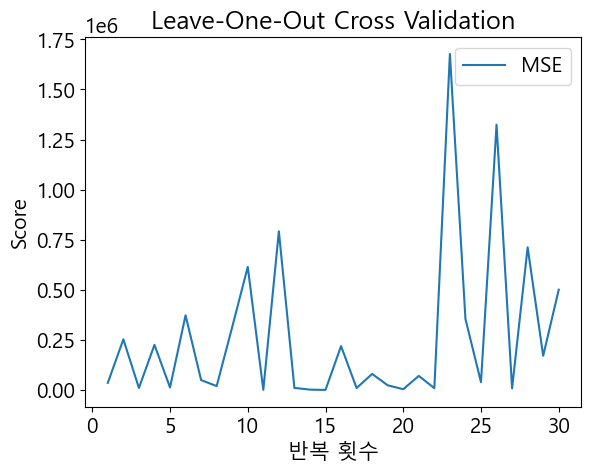

In [20]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15 # 글자크기

# 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결
matplotlib.rcParams['axes.unicode_minus']=False

# 반복 횟수
iterations = len(mse_list)

# 반복 횟수에 따른 MSE, MAE, Explained Variance를 그래프로 표현
plt.plot(range(1, iterations + 1), mse_list, label='MSE')

# 그래프 타이틀과 레이블 설정
plt.title('Leave-One-Out Cross Validation')
plt.xlabel('반복 횟수')
plt.ylabel('Score')

# 범례 표시
plt.legend()

# 그래프 출력
plt.show()

예측 결과와 실제값 간의 비교

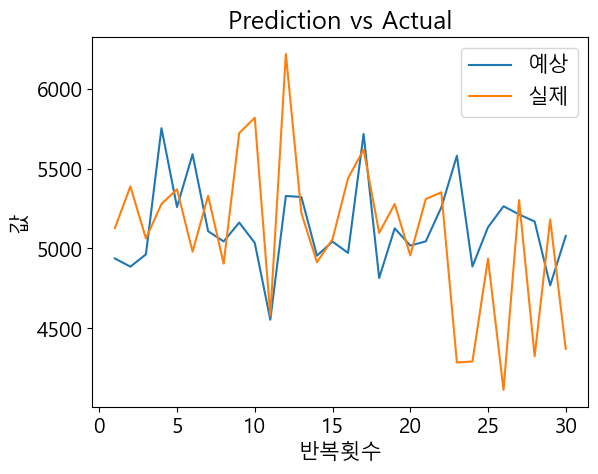

In [23]:
# 반복 횟수
iterations = len(y_pred_list)

# 예측 결과와 실제값을 그래프로 표현
plt.plot(range(1, iterations + 1), y_pred_list, label='예상')
plt.plot(range(1, iterations + 1), y_test_list, label='실제')

# 그래프 타이틀과 레이블 설정
plt.title('Prediction vs Actual')
plt.xlabel('반복횟수')
plt.ylabel('값')

# 범례 표시
plt.legend()

# 그래프 출력
plt.show()
